In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
tweets_df = pd.read_csv("AirlineTweets.csv")
tweets_df.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets_df = tweets_df[["text","airline_sentiment"]]
tweets_df.head(1)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral


In [9]:
tweets_df = tweets_df[tweets_df["airline_sentiment"]!="neutral"]
tweets_df.head(5)

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [16]:
tweets_df["airline_sentiment"].unique()

array(['positive', 'negative'], dtype=object)

<Axes: xlabel='airline_sentiment', ylabel='count'>

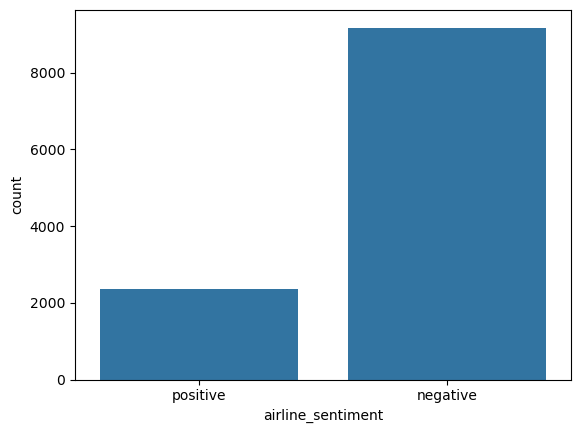

In [ ]:
sns.countplot(tweets_df,x="airline_sentiment")
# dataset is imbalance


In [18]:
tweets_df["target"] = tweets_df["airline_sentiment"].map({
    "positive": 1,
    "negative":0
})
tweets_df.head(3)

,text,airline_sentiment,target
1,@VirginAmerica plus you've added commercials t...,positive,1
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0


In [19]:
X_train,X_test,y_train,y_test = train_test_split(tweets_df["text"],tweets_df["target"])

In [22]:
print(len(X_train))
print(len(y_train))

8655
8655


In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train_Vector = vectorizer.fit_transform(X_train)
X_test_Vector = vectorizer.fit_transform(X_test)

In [29]:

X_train_Vector = X_train_Vector.toarray()
X_test_Vector = X_test_Vector.toarray()

In [31]:
X_train_Vector[0].shape

(2000,)

In [ ]:
# creating model 

import tensorflow as tf

2025-02-20 01:08:32.268341: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 01:08:32.277857: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 01:08:32.304836: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739995712.365939   72310 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739995712.384531   72310 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 01:08:32.449547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [74]:
inputs = tf.keras.Input(shape=(2000,))
layer_1 = tf.keras.layers.Dense(4,activation="relu")(inputs)
output = tf.keras.layers.Dense(1)(layer_1)
model = tf.keras.Model(inputs=inputs, outputs=output)

In [75]:
model.compile(  
    optimizer=tf.keras.optimizers.Adam(),  
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[  
             "accuracy"
    ],  
    
)  

In [76]:
history = model.fit(X_train_Vector,y_train,epochs=15)

Epoch 1/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7981 - loss: 0.6158
Epoch 2/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8034 - loss: 0.4144
Epoch 3/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8361 - loss: 0.3107
Epoch 4/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8796 - loss: 0.2421
Epoch 5/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9067 - loss: 0.2097
Epoch 6/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9167 - loss: 0.1781
Epoch 7/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9329 - loss: 0.1584
Epoch 8/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9403 - loss: 0.1420
Epoch 9/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9463 - loss: 0.1368
Epoch 10/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9482 - loss: 0.1267
Epoch 11/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9502 - loss: 0.1265
Epoch 12/15
271/271 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

In [80]:
model.evaluate(X_test_Vector,y_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7804 - loss: 0.6973


[0.7079309821128845, 0.7823978066444397]

In [79]:
y_pred =model.predict(X_test_Vector)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [81]:
# confusion_matrix(y_test,y_pred)
y_pred 

array([[-3.3247528],
       [-4.3125916],
       [-3.5393443],
       ...,
       [-1.0917183],
       [-3.8145225],
       [-5.97776  ]], dtype=float32)

In [82]:

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         8,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,029 (93.87 KB)

 Trainable params: 8,009 (31.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,020 (62.58 KB)

In [73]:
y_pred[2:5,:1]

array([[0.00373126],
       [0.00726822],
       [0.05349183]], dtype=float32)

In [84]:
False * 1

0